# Risk analysis in stock

Following a class, different risk analysis tests will be performed on a portofolio composed of:

*ETF*
- Gold ETF (GLD)

*Equities*
- Coca-Cola (KO)
- Tesla (TSLA)
- Total (TOT)
- Technip FMC (FTI)
- Walmart (WMT)
- Alibaba (BABA)


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [119]:
# import data (Yahoo! Finance Historical Data, from 04/04/17 to 04/04/19)

gold = pd.read_csv("GLD.csv")
coca_cola = pd.read_csv("KO.csv")
walmart = pd.read_csv("WMT.csv")
technip = pd.read_csv("FTI.csv")
alibaba = pd.read_csv("BABA.csv")
tesla = pd.read_csv("TSLA.csv")
total = pd.read_csv("TOT.csv")

names = [gold, coca_cola, walmart, technip, alibaba, tesla, total]
col_names = ["gold", "coca_cola", "walmart", "technip", "alibaba", "tesla", "total"]

In [120]:
# functions

#Risk Weighted Asset function

def rwa(var):
    rwa = 12.5*3*(var_1)*np.sqrt(10)
    if rwa < 0:
        rwa = rwa*(-1)
    return rwa

In [121]:
# dropping useless columns, rename to merge, generate random portofolio volumes

for (l,c) in zip(names,col_names):
    l.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)
    l.rename(columns = {"Close": c}, inplace = True)
    name_c = "volume_"+ c
    l[name_c] = 0
    l[name_c] = np.random.randint(500, 1000)
    name_v = 'value_'+ c
    l[name_v] = l[name_c] * l[c]
    l.set_index("Date", inplace = True)

### VaR of a portofolio of 7 names

In [101]:
# merging the 7 names dataframes

merged = reduce(lambda left,right: pd.merge(left,right, left_index = True, right_index = True), names)
merged.head()

,gold,volume_gold,value_gold,coca_cola,volume_coca_cola,value_coca_cola,walmart,volume_walmart,value_walmart,technip,...,value_technip,alibaba,volume_alibaba,value_alibaba,tesla,volume_tesla,value_tesla,total,volume_total,value_total
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-04,119.620003,675,80743.502025,42.680000,939,40076.520000,72.010002,790,56887.90158,32.630001,...,27180.790833,107.519997,517,55587.838449,303.700012,818,248426.609816,51.080002,747,38156.761494
2017-04-05,119.620003,675,80743.502025,42.570000,939,39973.230000,71.650002,790,56603.50158,32.959999,...,27455.679167,107.440002,517,55546.481034,295.000000,818,241310.000000,50.840000,747,37977.480000
2017-04-06,119.180000,675,80446.500000,42.669998,939,40067.128122,71.430000,790,56429.70000,33.630001,...,28013.790833,108.040001,517,55856.680517,298.700012,818,244336.609816,51.869999,747,38746.889253
2017-04-07,119.459999,675,80635.499325,42.610001,939,40010.790939,72.900002,790,57591.00158,33.500000,...,27905.500000,108.989998,517,56347.828966,302.540009,818,247477.727362,51.880001,747,38754.360747
2017-04-10,119.459999,675,80635.499325,42.689999,939,40085.909061,73.059998,790,57717.39842,33.639999,...,28022.119167,111.699997,517,57748.898449,312.390015,818,255535.032270,51.590000,747,38537.730000


In [102]:
# create columns to assess the value of portofolio at t, 1-day and 10-day pnl

values = merged.filter(regex ="value")
total = values.sum(axis = 1)
merged["portofolio_value"] = total
merged["pnl"] = merged["portofolio_value"].diff()
merged["ten_days_pnl"]= merged["portofolio_value"].diff(periods = 10)
merged.head()

,gold,volume_gold,value_gold,coca_cola,volume_coca_cola,value_coca_cola,walmart,volume_walmart,value_walmart,technip,...,value_alibaba,tesla,volume_tesla,value_tesla,total,volume_total,value_total,portofolio_value,pnl,ten_days_pnl
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-04,119.620003,675,80743.502025,42.680000,939,40076.520000,72.010002,790,56887.90158,32.630001,...,55587.838449,303.700012,818,248426.609816,51.080002,747,38156.761494,547059.924197,NaN,NaN
2017-04-05,119.620003,675,80743.502025,42.570000,939,39973.230000,71.650002,790,56603.50158,32.959999,...,55546.481034,295.000000,818,241310.000000,50.840000,747,37977.480000,539609.873806,-7450.050391,NaN
2017-04-06,119.180000,675,80446.500000,42.669998,939,40067.128122,71.430000,790,56429.70000,33.630001,...,55856.680517,298.700012,818,244336.609816,51.869999,747,38746.889253,543897.298541,4287.424735,NaN
2017-04-07,119.459999,675,80635.499325,42.610001,939,40010.790939,72.900002,790,57591.00158,33.500000,...,56347.828966,302.540009,818,247477.727362,51.880001,747,38754.360747,548722.708919,4825.410378,NaN
2017-04-10,119.459999,675,80635.499325,42.689999,939,40085.909061,73.059998,790,57717.39842,33.639999,...,57748.898449,312.390015,818,255535.032270,51.590000,747,38537.730000,558282.586692,9559.877773,NaN


In [103]:
merged.dropna(axis = 0, inplace = True)
merged_pnl = merged["pnl"]

In [104]:
merged_pnl = merged_pnl.sort_values()

In [105]:
merged_pnl.head()

Date
2018-09-28   -35863.523398
2019-01-18   -34472.905142
2018-02-08   -32459.216361
2018-03-27   -27977.205748
2018-12-24   -23358.988191
Name: pnl, dtype: float64

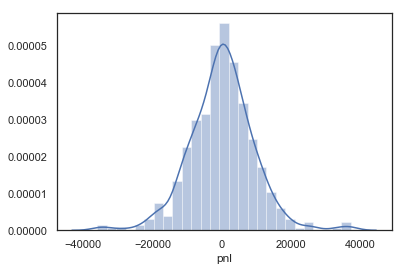

In [106]:
# plotting the distribution on 1-day pnl

sns.distplot(merged_pnl)

In [107]:
# value at risk (1-day pnl)

var_1 = merged_pnl.iloc[4] 
var_1

-23358.98819100007

In [108]:
# sorting the 10-day pnl column

merged_pnl_10 = merged["ten_days_pnl"]
merged_pnl_10 = merged_pnl_10.sort_values()

# value at risk (10-day pnl)

var_10 = merged_pnl_10.iloc[4]
var_10

-60638.31420699996

In [109]:
rwa = rwa(var_1)
rwa

2770035.244520119

In [110]:
capital_requirements = rwa*0.08
capital_requirements

221602.81956160953

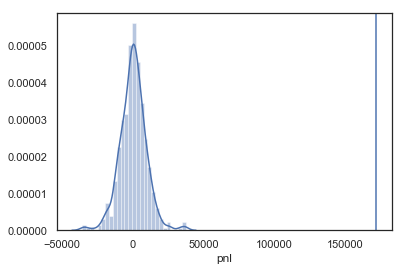

In [111]:
sns.distplot(merged_pnl)
plt.axvline(171848.87)

In [112]:
gold = pd.read_csv("GLD.csv")
coca_cola = pd.read_csv("KO.csv")
walmart = pd.read_csv("WMT.csv")
technip = pd.read_csv("FTI.csv")
alibaba = pd.read_csv("BABA.csv")
tesla = pd.read_csv("TSLA.csv")
total = pd.read_csv("TOT.csv")

names = [gold, coca_cola, walmart, technip, alibaba, tesla, total]
col_names = ["gold", "coca_cola", "walmart", "technip", "alibaba", "tesla", "total"]

In [113]:
for (l,c) in zip(names,col_names):
    l.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)
    l["name"] = c
    l.drop("Date", inplace = True, axis = 1)
    l = l[["name", "Close"]]

In [114]:
concat = pd.concat([tesla, walmart, gold, walmart, technip, alibaba, total])
concat.reset_index(drop = True, inplace = True)

C:\Users\Theau Poulat\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Users\Theau Poulat\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Users\Theau Poulat\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
C:\Users\Theau Poulat\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not app

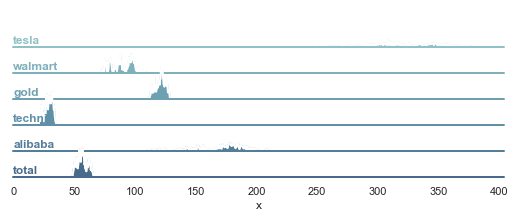

In [115]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data

x = concat["Close"]
g = concat["name"]
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [116]:
tesla


,Close,name
0,303.700012,tesla
1,295.000000,tesla
2,298.700012,tesla
3,302.540009,tesla
4,312.390015,tesla
5,308.709991,tesla
6,296.839996,tesla
7,304.000000,tesla
8,301.440002,tesla
9,300.250000,tesla
